Yêu cầu:
- Cùng kích thước
- Là ảnh đa cấp xám

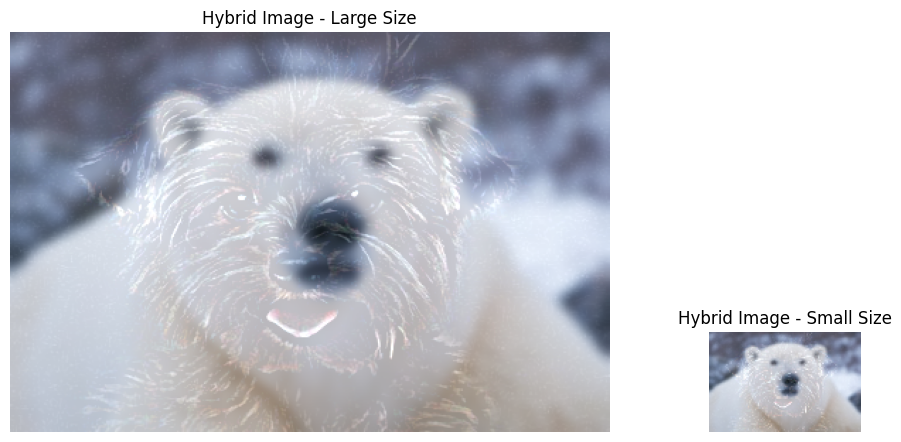

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_low_pass_filter(image, kernel_size=21):
    """
    Áp dụng lọc thông thấp (Gaussian blur).
    """
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

def apply_high_pass_filter(image, kernel_size=21):
    """
    Tạo lọc thông cao bằng cách trừ ảnh Gaussian blur khỏi ảnh gốc.
    """
    low_pass = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    return cv2.subtract(image, low_pass)

def create_hybrid_image(image1, image2, kernel_size=21):
    """
    Tạo ảnh lai từ hai ảnh sử dụng lọc thông thấp và thông cao.
    """
    low_pass = apply_low_pass_filter(image1, kernel_size)
    high_pass = apply_high_pass_filter(image2, kernel_size)
    return cv2.add(low_pass, high_pass)

# Đọc hai ảnh
image1 = cv2.imread('image/Bear.jpg')
image2 = cv2.imread('image/Dog.jpg')

# Resize ảnh thứ hai để khớp với kích thước của ảnh thứ nhất
image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

# Chuyển đổi ảnh sang RGB để hiển thị bằng matplotlib
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Tạo ảnh lai
hybrid_image = create_hybrid_image(image1, image2)

# Lưu và hiển thị ảnh kích thước nhỏ hơn
small_hybrid_image = cv2.resize(hybrid_image, 
                                (int(hybrid_image.shape[1]/4), 
                                 int(hybrid_image.shape[0]/4)))

# Hiển thị ảnh lai
# Thiết lập kích thước tổng thể cho figure
fig = plt.figure(figsize=(10, 5)) 
# left, bottom, width, height (range 0 to 1)
ax1 = fig.add_axes([0.05, 0.1, 0.65, 0.8])  
ax1.imshow(hybrid_image)
ax1.set_title('Hybrid Image - Large Size')
ax1.axis('off')

# Điều chỉnh vị trí và kích thước của ảnh nhỏ hơn
ax2 = fig.add_axes([0.75, 0.1, 0.2, 0.2])  
ax2.imshow(small_hybrid_image)
ax2.set_title('Hybrid Image - Small Size')
ax2.axis('off')

plt.show()